In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json


In [2]:
def get_datasets(fpath, condition=None):
    unit = 0
    datasets = []
    for root, dir, files in os.walk(fpath):
        if 'log.txt' in files:
            param_path = open(os.path.join(root,'params.json'))
            params = json.load(param_path)
            exp_name = params['exp_name']
            
            log_path = os.path.join(root,'log.txt')
            experiment_data = pd.read_table(log_path)

            experiment_data.insert(
                len(experiment_data.columns),
                'Unit',
                unit
                )        
            experiment_data.insert(
                len(experiment_data.columns),
                'Condition',
                condition or exp_name
                )

            datasets.append(experiment_data)
            unit += 1

    return datasets

In [3]:
data_p10 = get_datasets("q3/q3_h60_recurrent_is_generalization")[0]
data_p1 = get_datasets("q3/q3_h60_p1_recurrent_is_generalization")[0]
data_p100 = get_datasets("q3/q3_h60_p100_recurrent_is_generalization")[0]

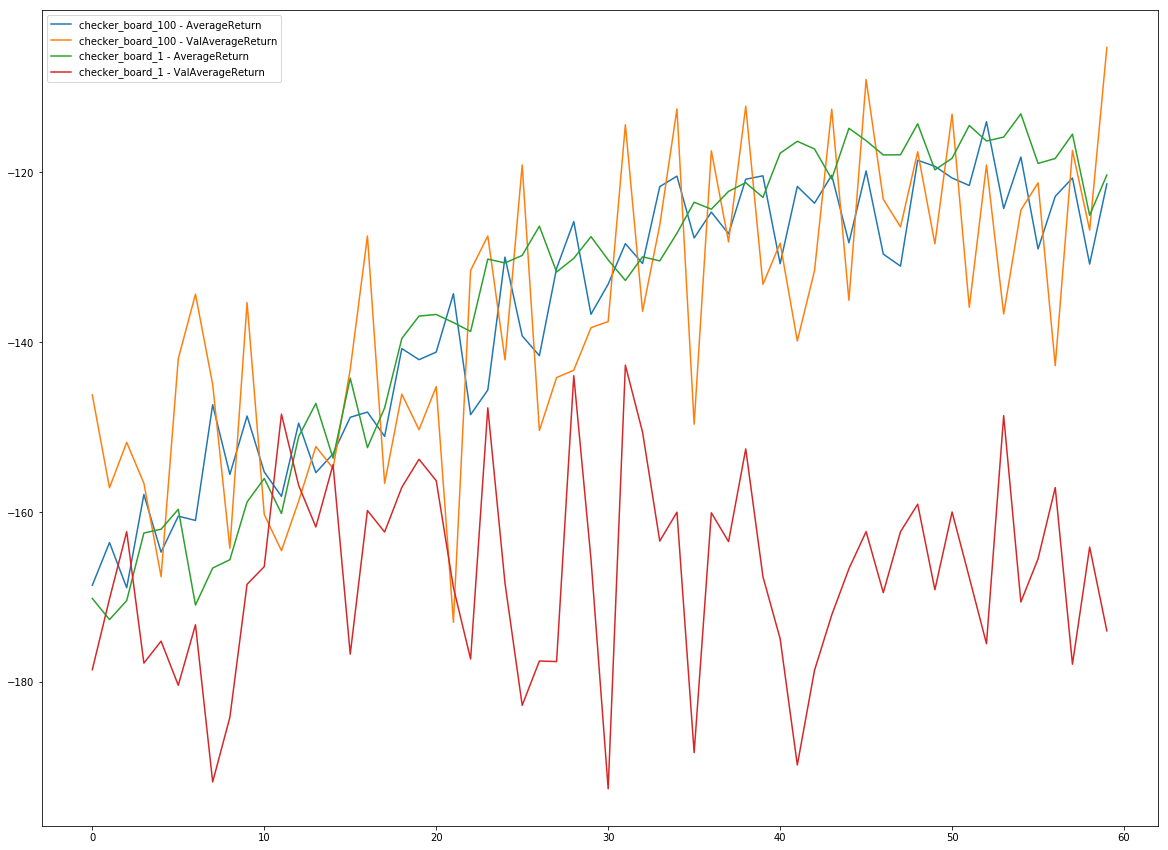

In [4]:
plt.rcParams['figure.figsize'] = [20, 15]

fig = plt.figure()

for frame,name in zip([data_p10, data_p1],["checker_board_100", "checker_board_1"]):
    for ret in ["AverageReturn", "ValAverageReturn"]:
        plt.plot(frame.index, frame[ret],label='{} - {}'.format(name, ret))
plt.legend()